In [3]:
import pandas as pd
import numpy as np
import json
# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import re
import sklearn
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [4]:
processed_df = pd.read_excel('../Data/ProcessedData/TMDB_processed.xlsx')

In [23]:
cols_2 = ['title', 'revenue', 'budget', 'release_date', 'popularity',
       'production_companies', 'runtime', 'cast', 'crew', 'cast_average',
       'crew_average', 'Action', 'Adventure', 'Fantasy', 'Science Fiction',
       'Drama', 'Romance', 'Thriller', 'Family', 'Animation', 'Crime',
       'Comedy', 'Mystery', 'Music', 'History', 'War', 'Horror', 'Western',
       'Documentary', 'TV Movie']

cols_3 = ['title', 'revenue', 'budget', 'release_date', 'popularity',
       'production_companies', 'runtime', 'cast', 'crew', 'cast_average',
       'crew_average', 'Warner Bros. Pictures', 'Universal Pictures', 'Paramount',
       '20th Century Fox', 'Columbia Pictures', 'Metro-Goldwyn-Mayer',
       'New Line Cinema', 'Walt Disney Pictures', 'Canal+',
       'Touchstone Pictures', 'United Artists', 'Miramax', 'TriStar Pictures',
       'Lionsgate', 'StudioCanal', 'Relativity Media', 'Sony Pictures',
       'DreamWorks Pictures', 'Village Roadshow Pictures',
       'Regency Enterprises', 'Fox Searchlight Pictures',
       'Working Title Films', 'Amblin Entertainment', 'Focus Features',
       'Toho Co.']

cols = ['title', 'revenue', 'budget', 'release_date', 'popularity',
       'production_companies', 'runtime', 'cast', 'crew', 'cast_average',
       'crew_average']

df = processed_df[cols]
df2 = processed_df[cols_2]
df3 = processed_df[cols_3]

**<span style="font-size:2em;">Correlation Analysis</span>**

**Functions to Assemble a Heatmap (unrestricted)**

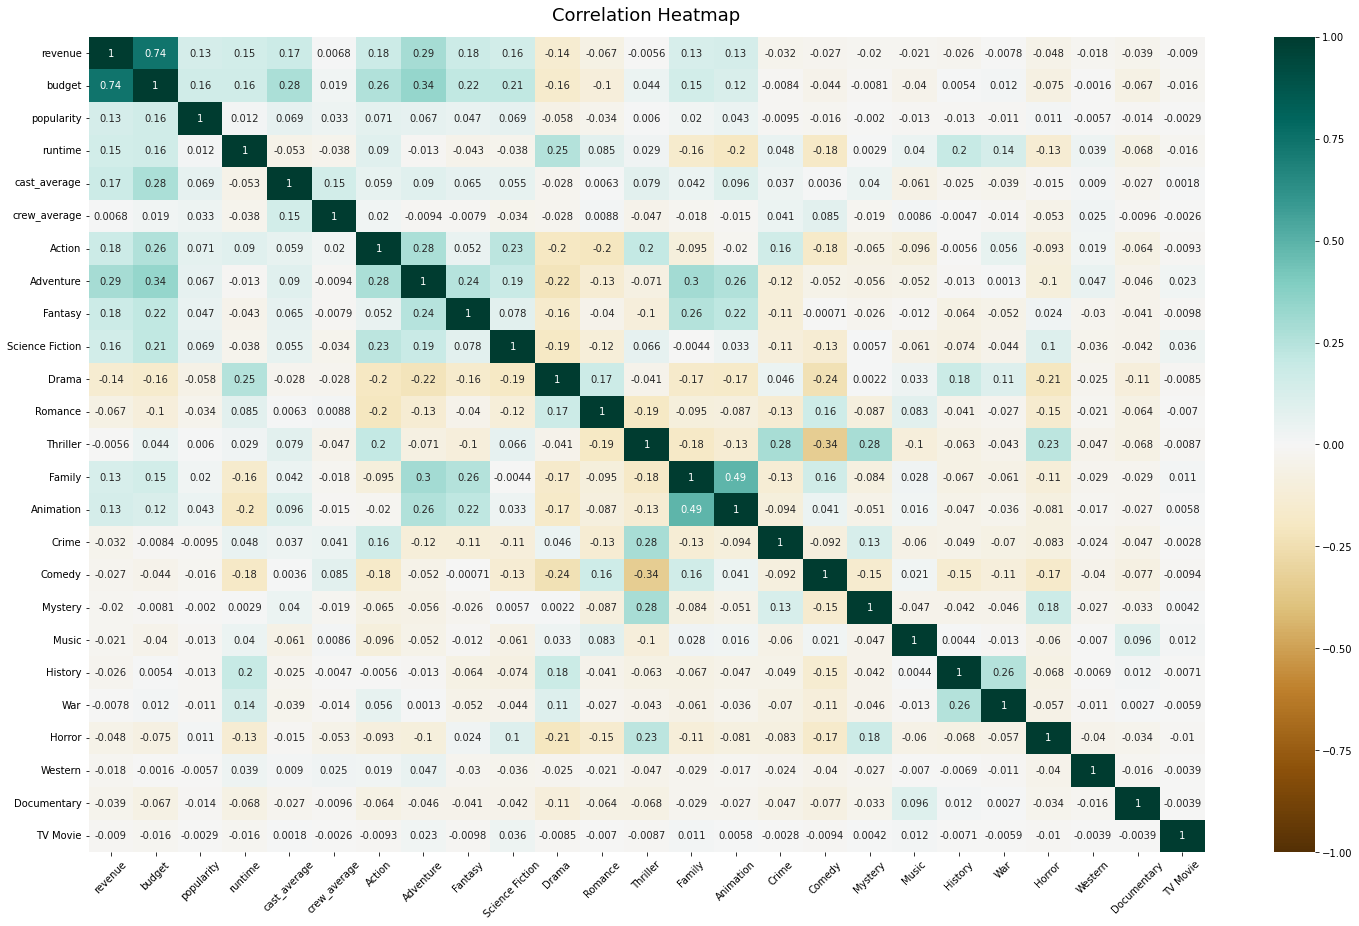

In [24]:
plt.figure(figsize=(25, 15))

heatmap = sns.heatmap(
    df2.corr(), 
    vmin=-1, vmax=1, 
    annot=True, 
    cmap='BrBG')
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

**Functions to Assemble a Heatmap (restricted)**

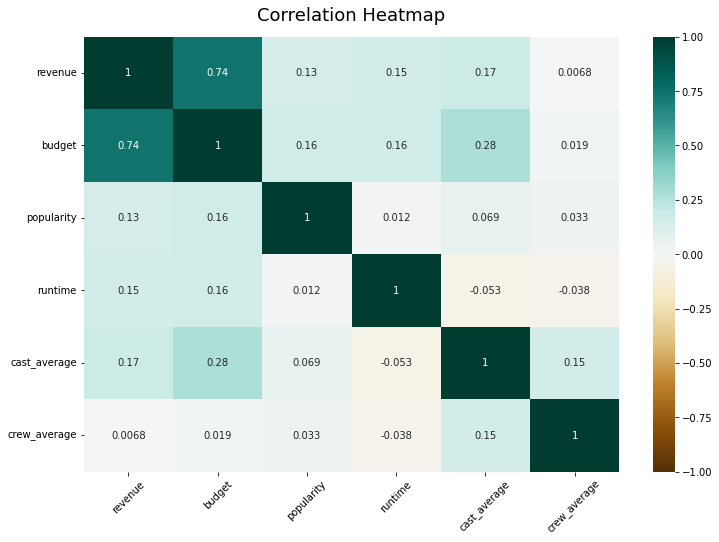

In [25]:
plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, 
    annot=True, 
    cmap='BrBG')
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

**<span style="font-size:2em;">Temporal Plots</span>**

**Convert Release Dates into DateTime Format**

In [26]:
df['release_date'] = df['release_date'].apply(lambda d: datetime.strptime(str(d), '%Y-%m-%d'))

**Get Month in which each movie was Released**

In [27]:
df['month'] = df['release_date'].dt.month

**Get Average Budget and Revenue for each Month**

In [28]:
mdict = dict(df.value_counts('month'))  # Value counts to see how many records are contained in each month bin

dmb = {}
dmr = {}
for m in range(1, 13):
    dmb[m] = 0
    dmr[m] = 0
    
for m in range(1, 13):
    for i in range(len(df.index)):
        if df.loc[i, 'month'] == m:
            dmb[m] += df.loc[i, 'budget']
            dmr[m] += df.loc[i, 'revenue']
    dmb[m] /= mdict[m]
    dmr[m] /= mdict[m]
    
df['monthly_avg_budget'] = df['month'].apply(lambda month: dmb[month])
df['monthly_avg_revenue'] = df['month'].apply(lambda month: dmr[month])

**Average Monthly Budget and Revenue Over the Years**

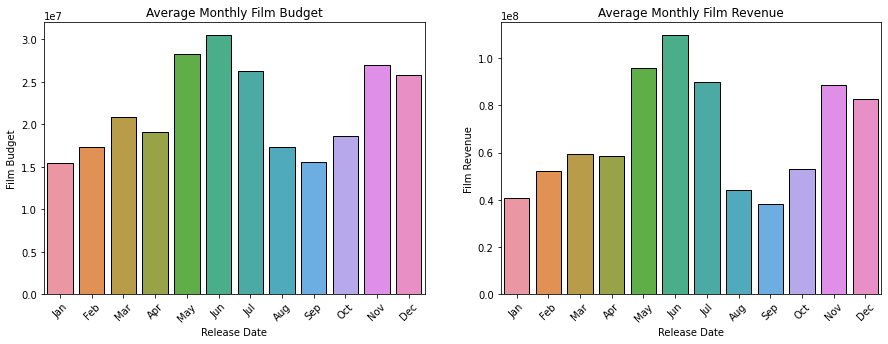

In [112]:
from numpy import median

df = df.sort_values(by='month')  # Sort Values by month so Time series is in order
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

ax1 = sns.barplot(edgecolor=(0, 0, 0), x=df['release_date'].dt.strftime("%b"), 
                  y='monthly_avg_budget', data=df, estimator=median, ax=axs[0])
ax1.set_xlabel('Release Date')
ax1.set_ylabel('Film Budget')
ax1.set_title('Average Monthly Film Budget')
plt.setp(ax1.get_xticklabels(), rotation=45)

ax2 = sns.barplot(edgecolor=(0, 0, 0), x=df['release_date'].dt.strftime("%b"), 
                  y='monthly_avg_revenue', estimator=median, data=df, ax=axs[1])
ax2.set_xlabel('Release Date')
ax2.set_ylabel('Film Revenue')
ax2.set_title('Average Monthly Film Revenue')
plt.setp(ax2.get_xticklabels(), rotation=45)

plt.show()

**Time Series for Budget and Revenue accross whole Data Set**

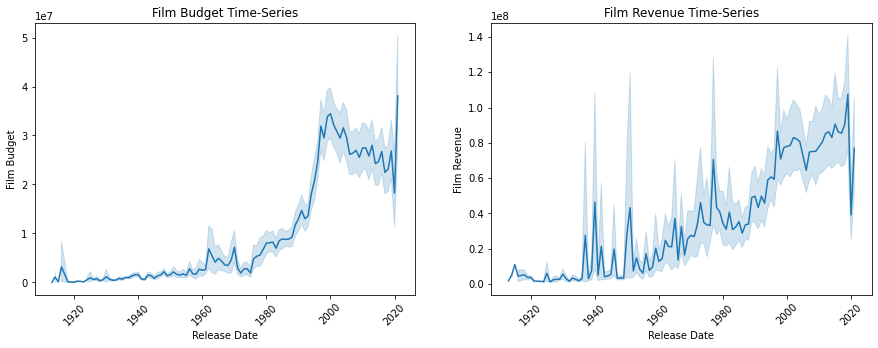

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

ax1 = sns.lineplot(x=df['release_date'].dt.year, y='budget', data=df, ax=axs[0])
ax1.set_xlabel('Release Date')
ax1.set_ylabel('Film Budget')
ax1.set_title('Film Budget Time-Series')
plt.setp(ax1.get_xticklabels(), rotation=45)

ax2 = sns.lineplot(x=df['release_date'].dt.year, y='revenue', data=df, ax=axs[1])
ax2.set_xlabel('Release Date')
ax2.set_ylabel('Film Revenue')
ax2.set_title('Film Revenue Time-Series')
plt.setp(ax2.get_xticklabels(), rotation=45)

plt.show()

**<span style="font-size:2em;">Correlative Plots</span>**

**Runtime Versus Revenue**

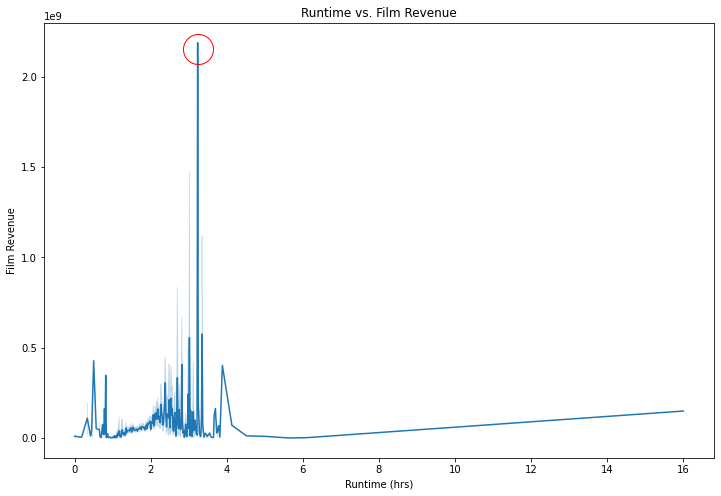

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['runtime'] / 60, y='revenue', data=df)
plt.xlabel('Runtime (hrs)')
plt.ylabel('Film Revenue')
plt.title('Runtime vs. Film Revenue')
plt.plot([3.25],[2150000000],'o', ms=30, mec='r', mfc='none') # Peaks around 3.25 hours with a revenue of around 220 million
plt.show()

**<span style="font-size:2em;">Count Plots</span>**

**Runtime Distribution**

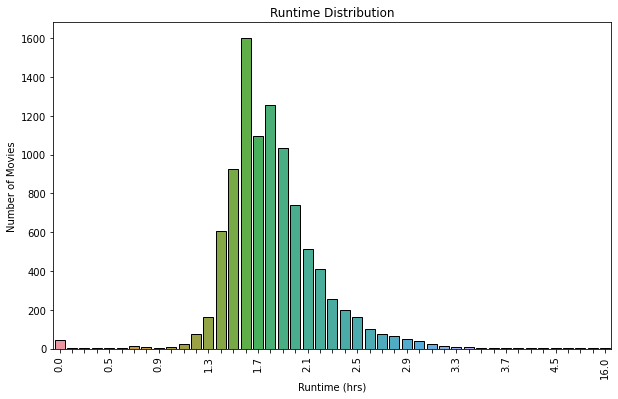

In [129]:
dfc = df.copy()
dfc['runtime'] = dfc['runtime'].apply(lambda r: round(r/60, 1))
plt.figure(figsize=(10,6))
plot = sns.countplot(dfc['runtime'].fillna(0), edgecolor=(0,0,0))
plt.title("Runtime Distribution")
plt.xlabel('Runtime (hrs)')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)

# https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn/38947307
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
        
plt.show()

**Release Month Distribution**

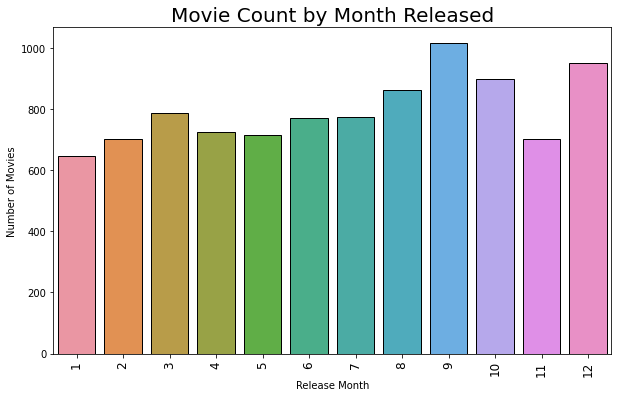

In [142]:
plt.figure(figsize=(10,6))
edgecolor=(0,0,0)
plot = sns.countplot(df['release_date'].dt.month.sort_values(), edgecolor=(0,0,0)) # Picking Everything after record 1000 (1980-2020)
plt.title("Movie Count by Month Released",fontsize=20)
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(fontsize=12,rotation=90)
plt.show()

**Release Day Distribution**

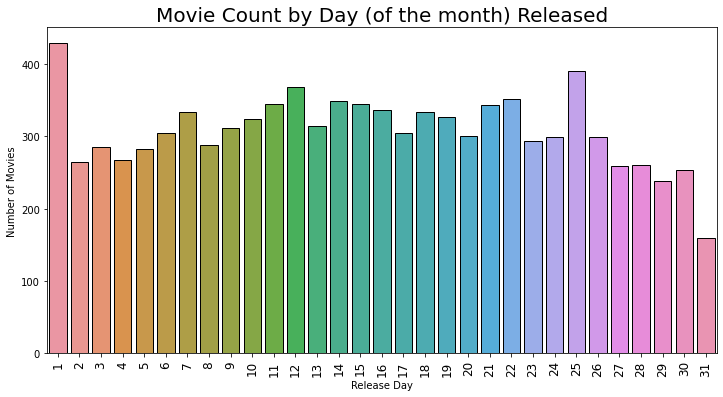

In [141]:
plt.figure(figsize=(12,6))
edgecolor=(0,0,0)
plot = sns.countplot(df['release_date'].dt.day.sort_values(), edgecolor=(0,0,0)) # Picking Everything after record 1000 (1980-2020)
plt.title("Movie Count by Day (of the month) Released",fontsize=20)
plt.xlabel('Release Day')
plt.ylabel('Number of Movies')
plt.xticks(fontsize=12,rotation=90)
plt.show()

**Realese Year Distribution**  
Note: I capped it at 1980 (because >80% of movie were released post 1980), but we can see as far as 1913

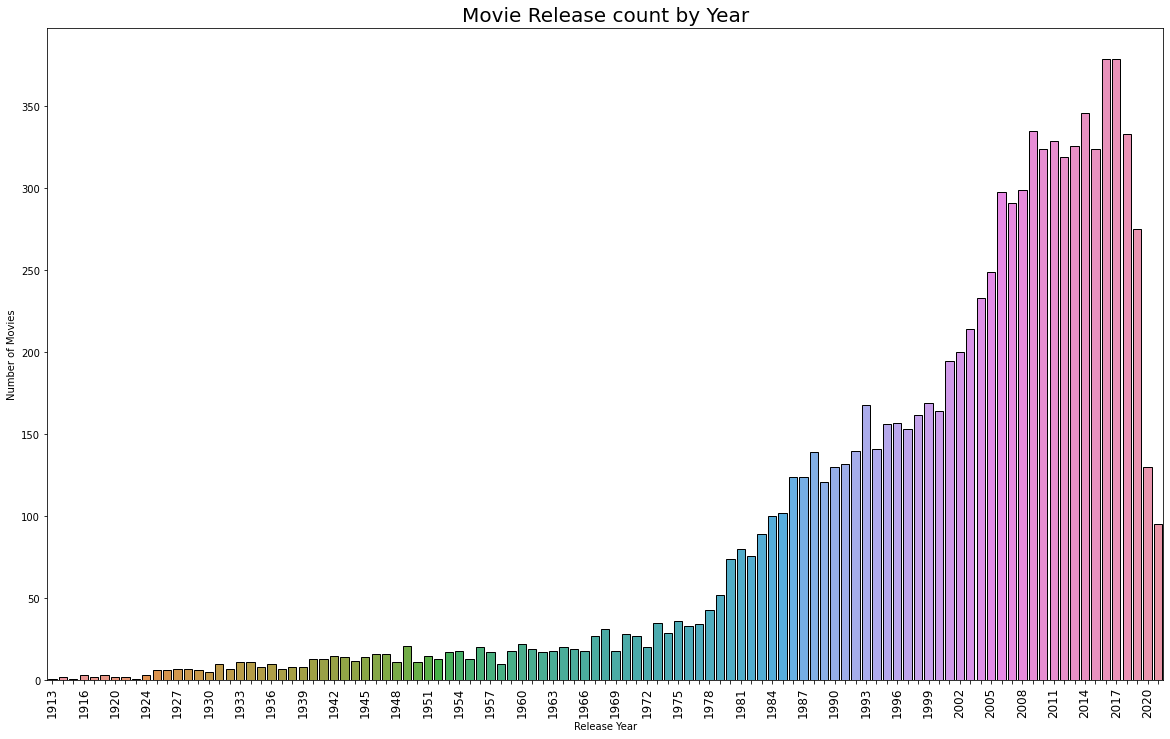

In [132]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0)
plot = sns.countplot(df['release_date'].dt.year.sort_values(), edgecolor=(0,0,0)) # Picking Everything after record 1000 (1980-2020)
plt.title("Movie Release count by Year",fontsize=20)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(fontsize=12,rotation=90)

# https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn/38947307
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 3 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
plt.show()

**<span style="font-size:2em;">Custom Count Plots</span>**

**Genre Distribution**  
Note: Because Genres are onehot encoded we need to do value counts one-by-one

In [33]:
genre_dict = {}
for genre in df2.columns[11:]:
    genre_dict[genre] = df2.value_counts(genre)[1]

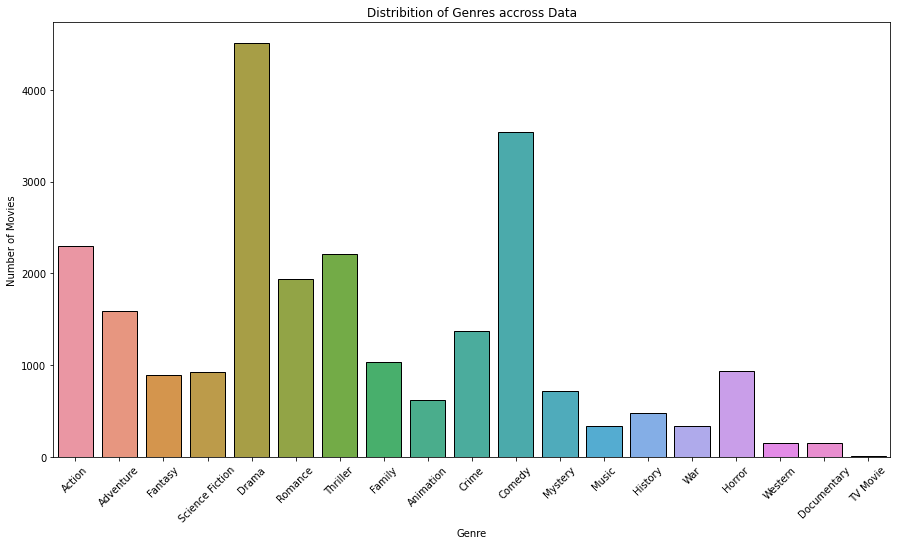

In [110]:
plt.figure(figsize=(15, 8))
sns.barplot(edgecolor=(0,0,0), x=list(genre_dict.keys()), y=list(genre_dict.values()))
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribition of Genres accross Data')
plt.show()

**Production Company Distribution**  
Note: Because companies are onehot encoded we need to do value counts one-by-one

In [53]:
comp_dict = {}
for comp in df3.columns[11:]:
    comp_dict[comp] = df3.value_counts(comp)[1]

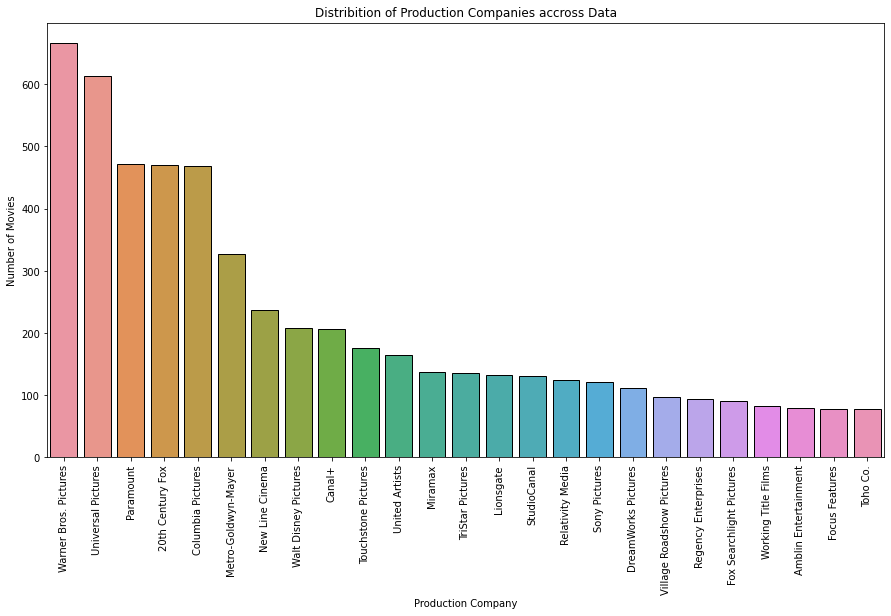

In [111]:
plt.figure(figsize=(15, 8))
sns.barplot(edgecolor=(0, 0, 0), x=list(comp_dict.keys()), y=list(comp_dict.values()))
plt.xticks(rotation=90)
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.title('Distribition of Production Companies accross Data')
plt.show()

**<span style="font-size:2em;">Value Counts</span>**

**Original Language Value Counts (%)**  
Note: Because languages are onehot encoded we need to do value counts one-by-one

In [75]:
lang_dict = {}
for lang in processed_df.columns[56:]:
    lang_dict[lang.split('_')[2]] = '{}%'.format(int((processed_df.value_counts(lang)[1]/9554) * 100))

In [77]:
for k, v in lang_dict.items():
    if v != '0%':
        print(k, ':', v)

de : 1%
en : 75%
es : 2%
fr : 2%
hi : 2%
it : 1%
ja : 2%
ko : 1%
ru : 1%
zh : 1%
